In [35]:
import pandas as pd

In [28]:
data = pd.read_csv("data6.tsv",sep='\t',header=None,names=["x", "y"])
print(data)

          x         y
0    21.252  -555.640
1   179.842  3840.141
2   118.162  2274.989
3   114.269  1146.575
4   121.444  1840.589
5    87.624  1663.894
6   170.039  3504.537
7   192.651  3708.239
8    12.390  -358.240
9   144.264  2444.162
10  169.900  3348.941
11   63.254   271.623
12   72.439   900.423
13   71.108    77.543
14  179.476  3313.424
15  169.084  2525.653
16   99.073   734.413
17  195.528  4067.410
18  131.023  2182.147
19   12.424   490.714


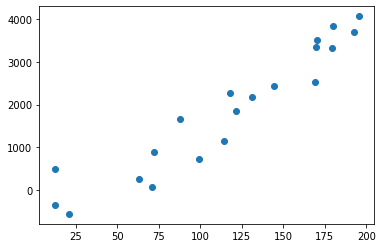

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data['x'], data['y'])
plt.show()

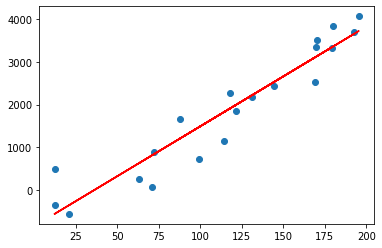

In [30]:
# Regresja wielomianowa I stopnia
from sklearn.linear_model import LinearRegression

X=data[['x']]
Y=data['y']
model=LinearRegression()
model.fit(X,Y)
y_predicted = model.predict(X)

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], y_predicted, c="red")
plt.show()

In [31]:
# Regresja wielomianowa II stopnia
from sklearn.preprocessing import PolynomialFeatures

data = data.sort_values('x')
Y = data.sort_values('x')['y']

poly = PolynomialFeatures(2)
X_poly=poly.fit_transform(data[['x']])
#Y=data['y']
print(X_poly)
model=LinearRegression()
model.fit(X_poly,Y)
y_predicted = model.predict(X_poly)
print(y_predicted)

[[1.00000000e+00 1.23900000e+01 1.53512100e+02]
 [1.00000000e+00 1.24240000e+01 1.54355776e+02]
 [1.00000000e+00 2.12520000e+01 4.51647504e+02]
 [1.00000000e+00 6.32540000e+01 4.00106852e+03]
 [1.00000000e+00 7.11080000e+01 5.05634766e+03]
 [1.00000000e+00 7.24390000e+01 5.24740872e+03]
 [1.00000000e+00 8.76240000e+01 7.67796538e+03]
 [1.00000000e+00 9.90730000e+01 9.81545933e+03]
 [1.00000000e+00 1.14269000e+02 1.30574044e+04]
 [1.00000000e+00 1.18162000e+02 1.39622582e+04]
 [1.00000000e+00 1.21444000e+02 1.47486451e+04]
 [1.00000000e+00 1.31023000e+02 1.71670265e+04]
 [1.00000000e+00 1.44264000e+02 2.08121017e+04]
 [1.00000000e+00 1.69084000e+02 2.85893991e+04]
 [1.00000000e+00 1.69900000e+02 2.88660100e+04]
 [1.00000000e+00 1.70039000e+02 2.89132615e+04]
 [1.00000000e+00 1.79476000e+02 3.22116346e+04]
 [1.00000000e+00 1.79842000e+02 3.23431450e+04]
 [1.00000000e+00 1.92651000e+02 3.71144078e+04]
 [1.00000000e+00 1.95528000e+02 3.82311988e+04]]
[-202.19762153 -201.84331399 -104.38856

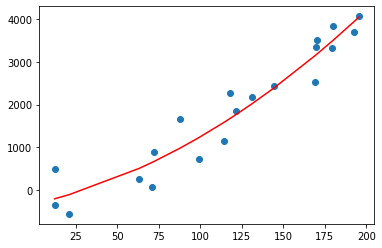

In [32]:
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], y_predicted, c="red")
plt.show()

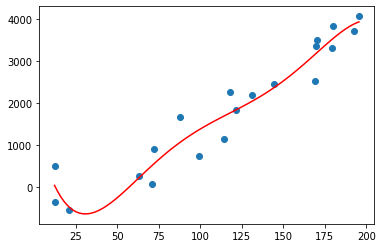

In [33]:
import numpy as np

poly = PolynomialFeatures(5)
X_poly=poly.fit_transform(data[['x']])
model=LinearRegression()
model.fit(X_poly,Y)
y_predicted = model.predict(X_poly)

X = np.linspace(data['x'].min(), data['x'].max(), num=100) 
X = X.reshape((len(X), 1))

plt.scatter(data['x'], data['y'])
plt.plot(X, model.predict(poly.fit_transform(X)), color = 'red')
plt.show()

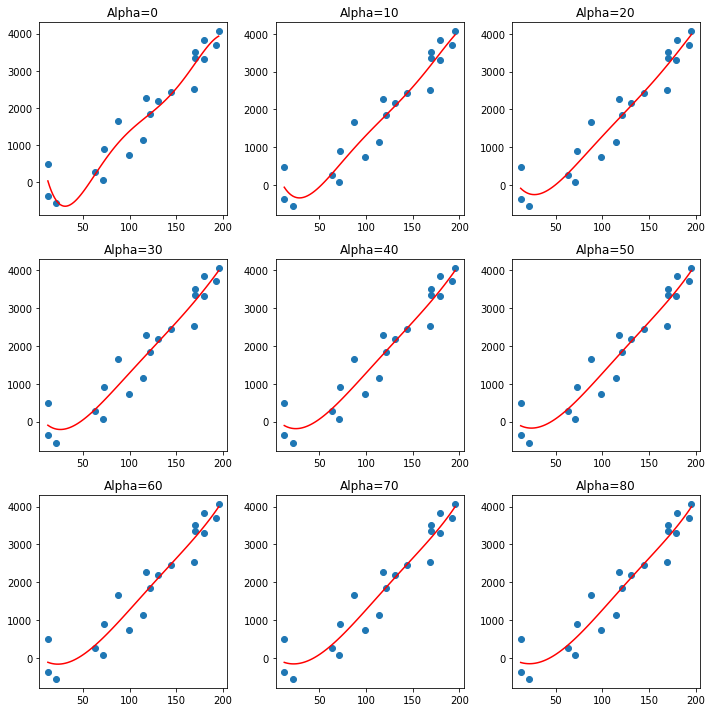

In [34]:
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(5)
X_poly=poly.fit_transform(data[['x']])
Y = data.sort_values('x')['y']
X = np.linspace(data['x'].min(), data['x'].max(), num=100) 
X = X.reshape((len(X), 1))

def ridge(alpha):
    model=Ridge(alpha=alpha)
    model.fit(X_poly,Y)
    #y_predicted = model.predict(X_poly)
    prediction = model.predict(poly.fit_transform(X))
    return prediction

parameters=range(0,90,10)
prediction=[ridge(alpha) for alpha in parameters]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()
i=0
for i in range(0,len(prediction)):
    #plt.figure()
    ax[i].scatter(data['x'], data['y'])
    ax[i].plot(X, prediction[i], color = 'red')
    ax[i].title.set_text(f"Alpha={parameters[i]}")
    i+=1
plt.tight_layout()
plt.show()